In [54]:
import numpy as np
import pandas as pd
import os
from scipy.stats import skewnorm
from scipy.stats import kstest
import matplotlib.pyplot as plt


In [55]:
def to_Yt(Xt):
    res = []
    for i in range(1, len(Xt)-1):
        res.append(0.25*Xt[i-1] + 0.5*Xt[i] + 0.25*Xt[i+1])
    return res

In [56]:
def moment_order_k(Yt, k):
    res = 0
    n = len(Yt)
    mean = np.mean(Yt)
    for i in range(n):
        res+= (Yt[i]-mean)**k
    return res/n

def skewness(Yt):
    return moment_order_k(Yt, 3)/(moment_order_k(Yt, 2)**(3/2))

In [57]:

def estimate_parameters(Yt, k):
    #using methods of moments estimation
    Yk = Yt[:k]
    Yk1 = Yt[k:]
    gamma = skewness(Yt)
    a = np.sqrt(2/np.sqrt(np.pi))
    b = 0.5 * (4 - np.pi)
    denom = (a**2)*((b**(2/3))+abs(gamma)**(2/3))
    delta = np.sign(gamma) * np.sqrt((abs(gamma)**(2/3))/denom)
    theta = delta/np.sqrt(1-delta**2)
    sigma1 = np.sqrt(moment_order_k(Yk, 2)/(1-(delta*a)**2))
    sigma2 = np.sqrt(moment_order_k(Yk1, 2)/(1-(delta*a)**2))
    mu1 = np.mean(Yk) - a*sigma1*delta
    mu2 = np.mean(Yk1) - a*sigma2*delta
    return (mu1, mu2, sigma1, sigma2, theta)


In [58]:
def find_break_point(Yt): 
    log_likely = []
    for i in range(10, len(Yt)-10):
        mu1, mu2, sigma1, sigma2, theta = estimate_parameters(Yt, i)
        ll = np.sum(skewnorm.logpdf(Yt[:i], theta, loc=mu1, scale=sigma1))
        ll2 = np.sum(skewnorm.logpdf(Yt[i:], theta, loc=mu2, scale=sigma2))
        log_likely.append(ll + ll2)
    breakpoint = log_likely.index(max(log_likely))+11
    mu1, mu2, sigma1, sigma2, theta = estimate_parameters(Yt, breakpoint)
    return breakpoint, mu1, mu2, sigma1, sigma2, theta 

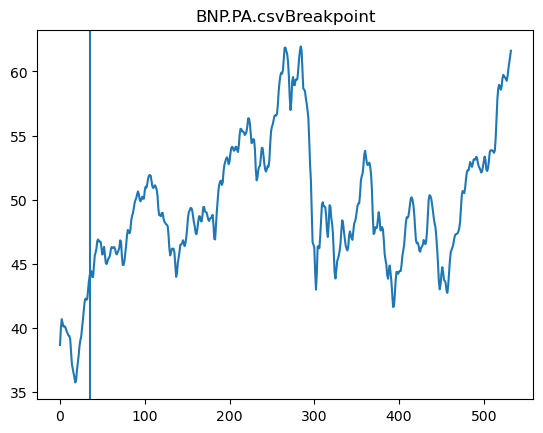

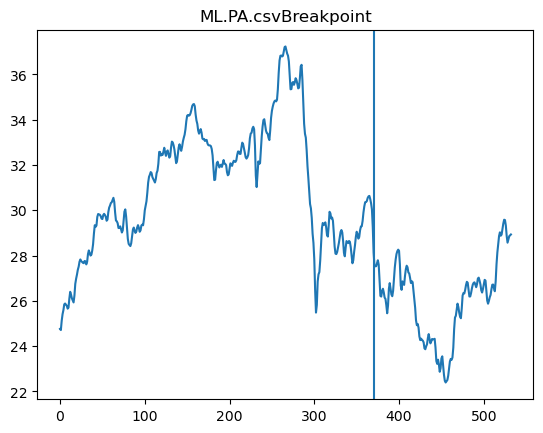

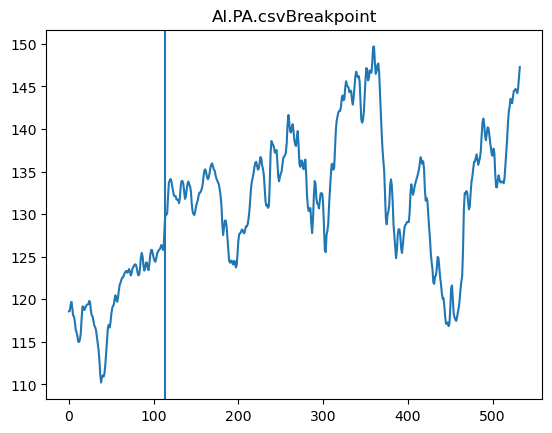

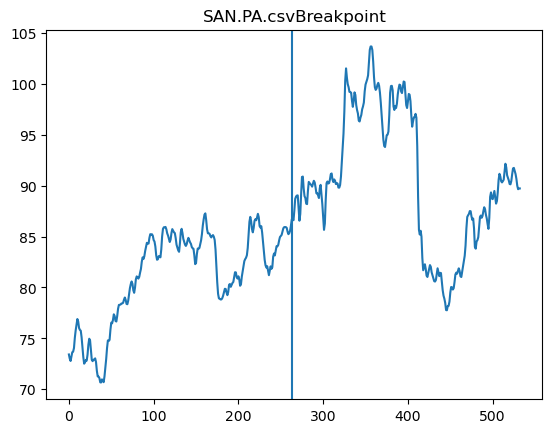

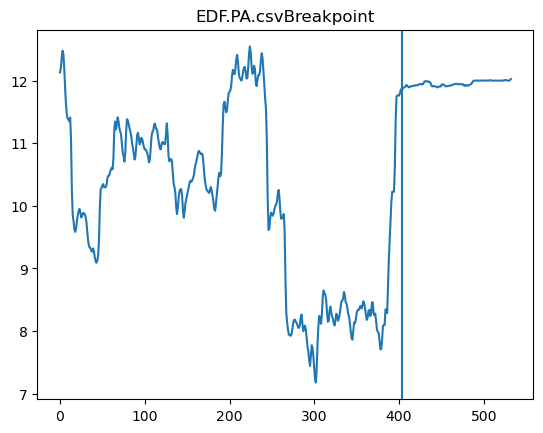

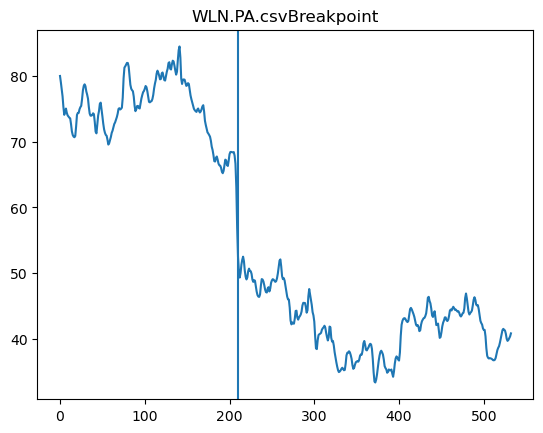

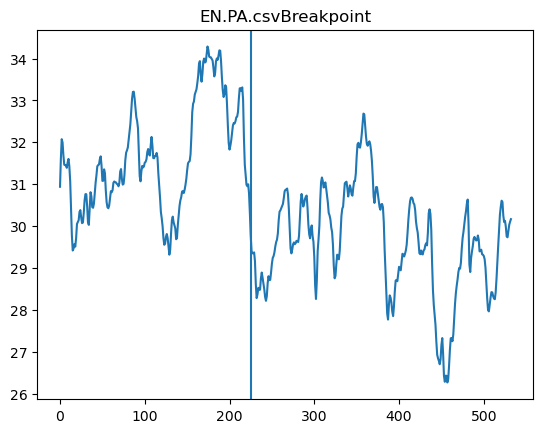

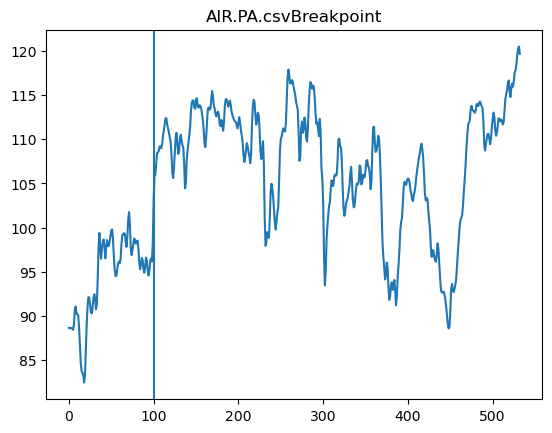

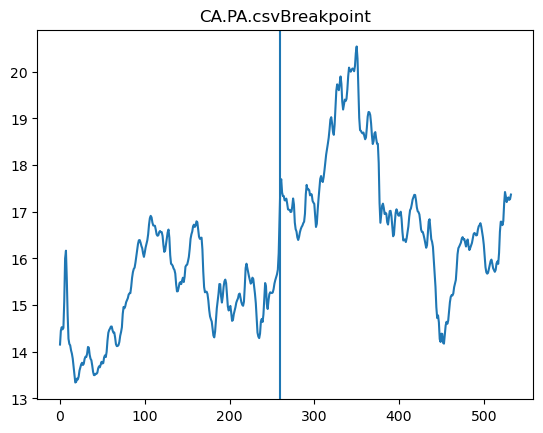

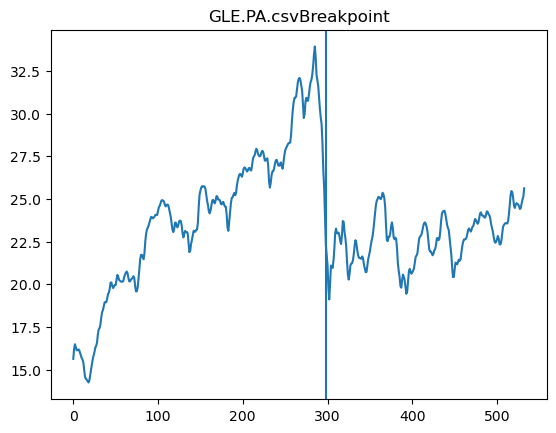

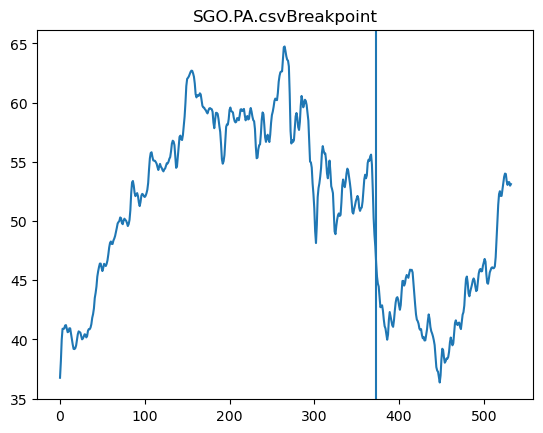

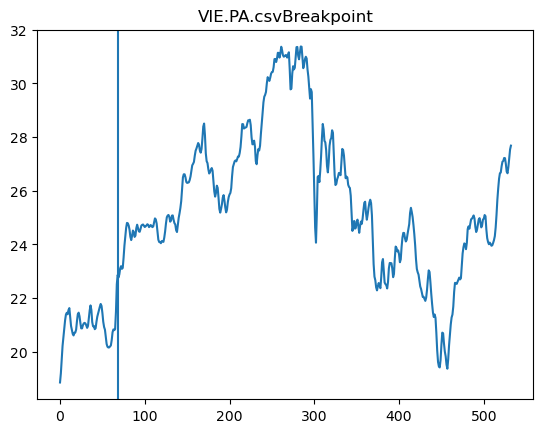

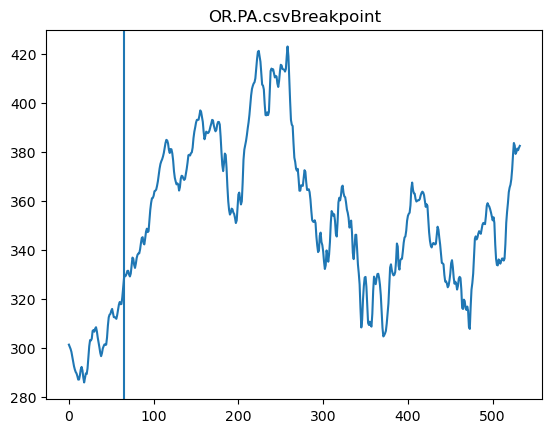

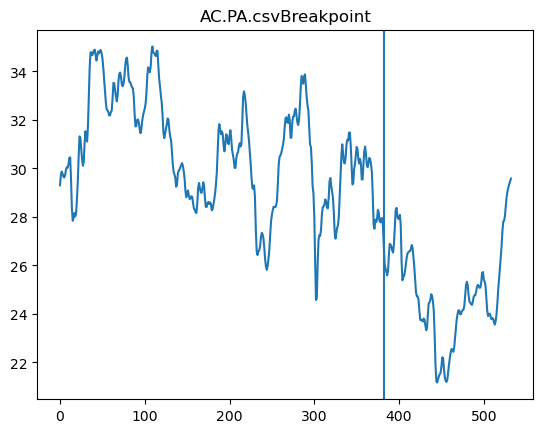

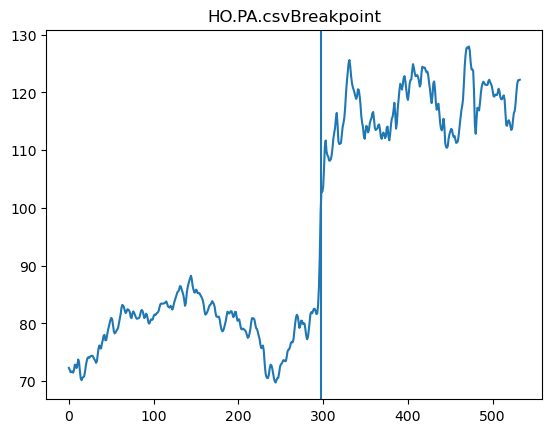

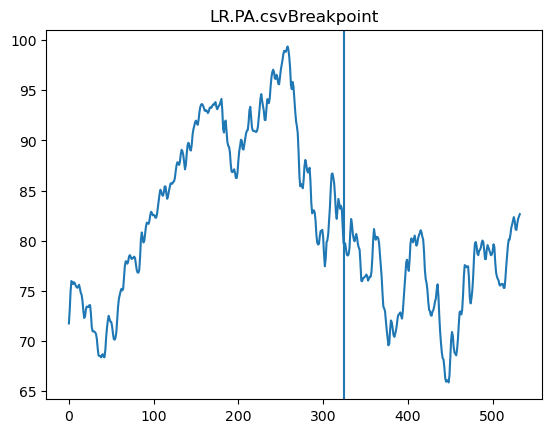

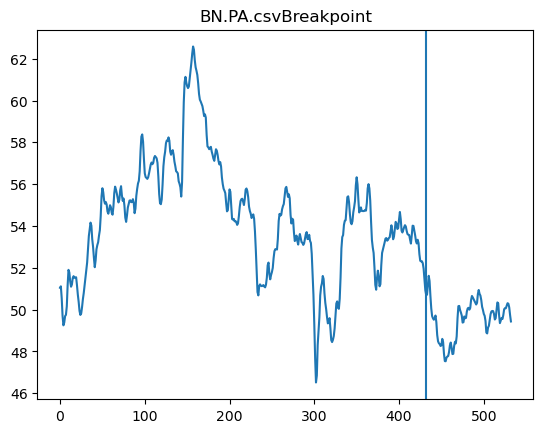

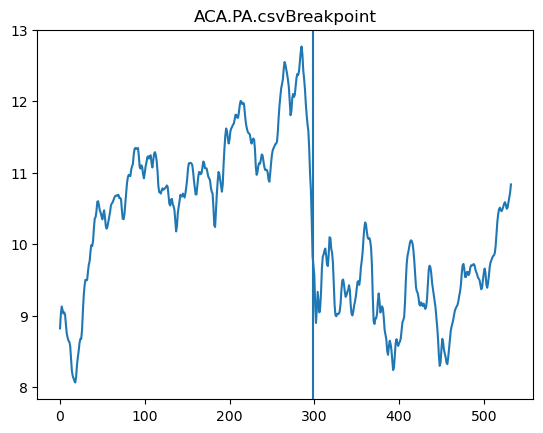

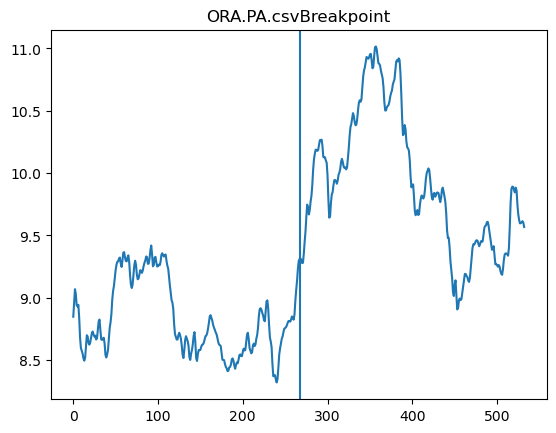

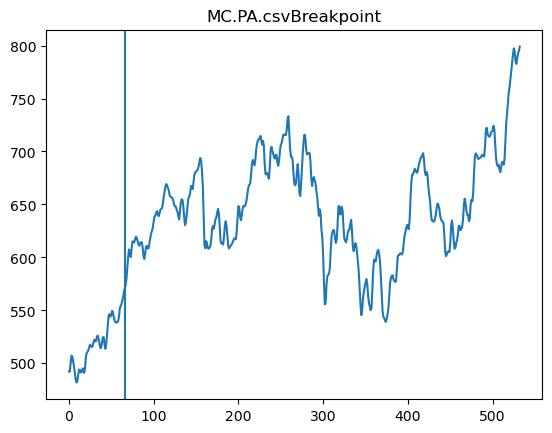

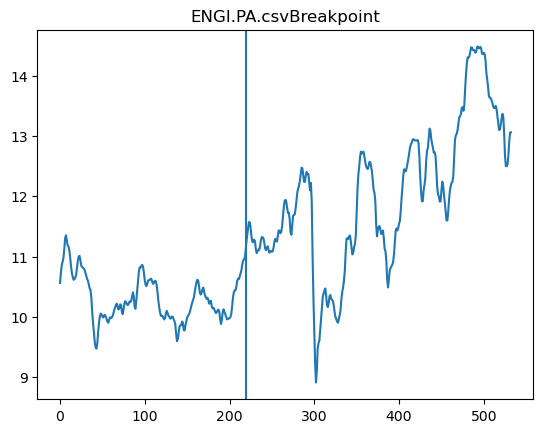

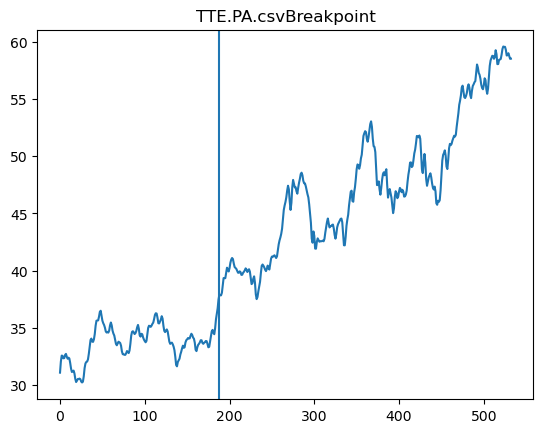

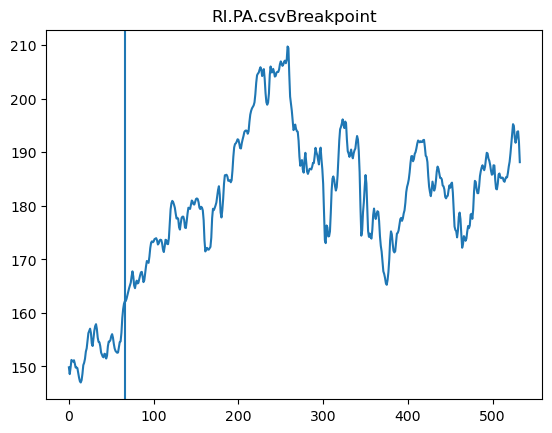

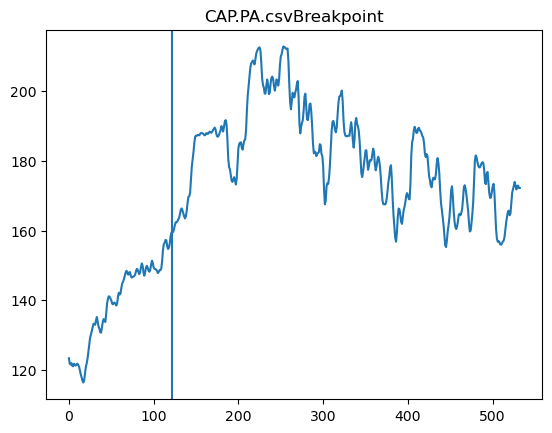

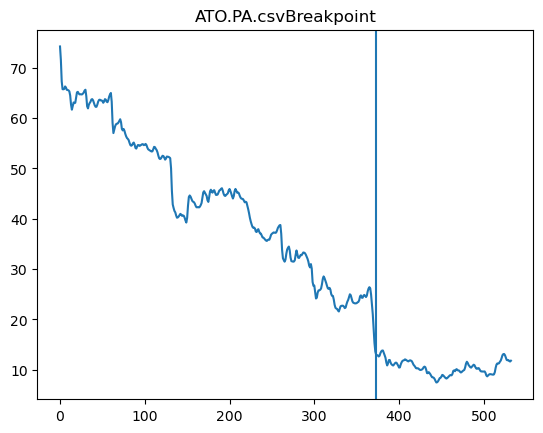

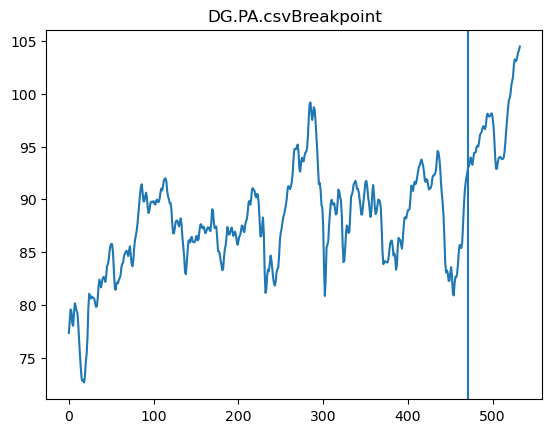

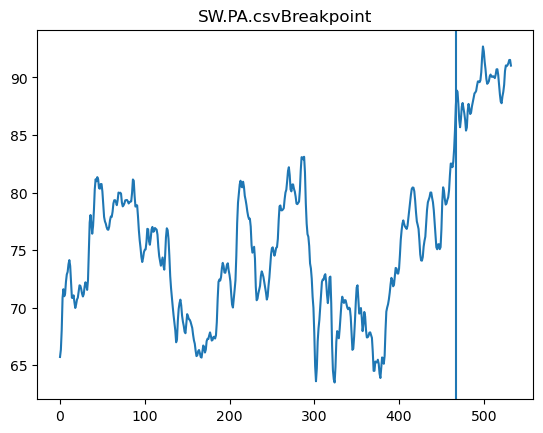

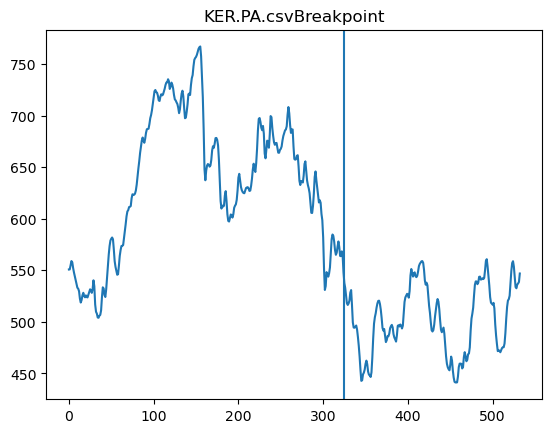

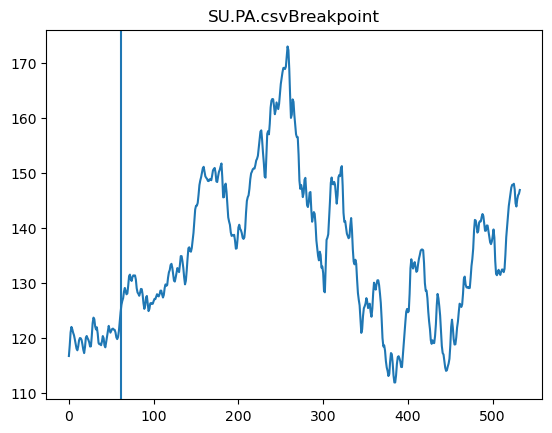

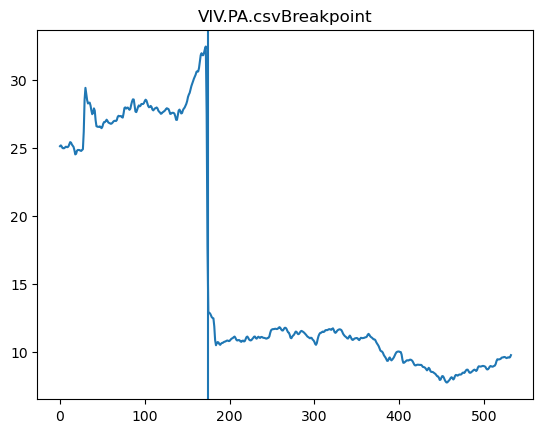

In [59]:
files_list = os.listdir("DonCAC40")
for i in range(len(files_list)):
    df = pd.read_csv("DonCAC40/"+files_list[i])
    Xt = df["Adj Close"].values.tolist()
    Yt = to_Yt(Xt)
    breakpoint, mu1, mu2, sigma1, sigma2, theta = find_break_point(Yt)
    plt.plot(Yt)
    if(kstest(Yt[:breakpoint], Yt[breakpoint:])[1]<0.05):
        plt.title(files_list[i] + "Breakpoint")
        plt.axvline(breakpoint)
    else:
        plt.title(files_list[i] + "No Breakpoint")
    plt.show()
    